**Nama**      : Jeremia Manurung

**NIM**       : 25/563379/PPA/07110

**Kelas**     : Magister Ilmu Komputer

**Mat.Kul**   : Pengolahan dan Analisis Citra Digital

**Gambar Asli**

Ukuran Gambar : 720 x 480


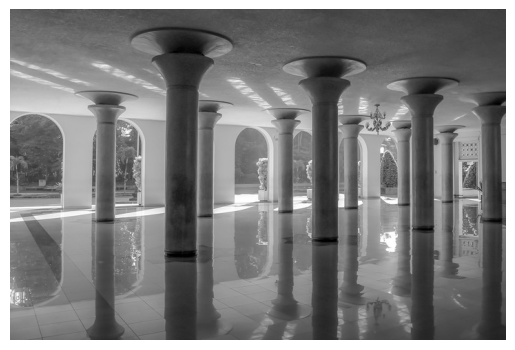

In [36]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

img=Image.open('./images/gambar.jpg')
img = np.array(img)
h, w = len(img), len(img[0])
print("Ukuran Gambar :", w, "x", h)

plt.figure()
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# **Down Sampling**

**MAX**

Ukuran Gambar : 144 x 96


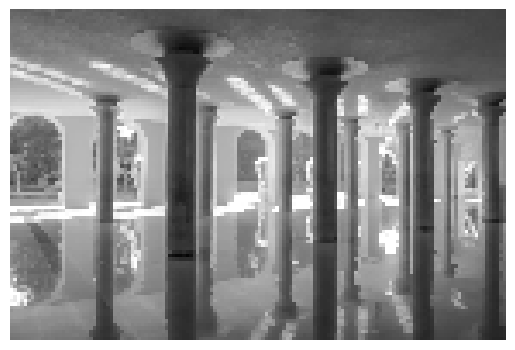

In [28]:
h, w = len(img), len(img[0])
block_h = 5
block_w = 5
out_h, out_w = h // block_h, w // block_w
out = [[0.0]*out_w for _ in range(out_h)]
for i in range(out_h):
    for j in range(out_w):
        block = [
            img[i*block_h + di][j*block_w + dj]
            for di in range(block_h)
            for dj in range(block_w)
        ]
        out[i][j] = max(block)

print("Ukuran Gambar :", out_w, "x", out_h)

plt.figure()
plt.imshow(out, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

**MEAN**

Ukuran Gambar : 144 x 96


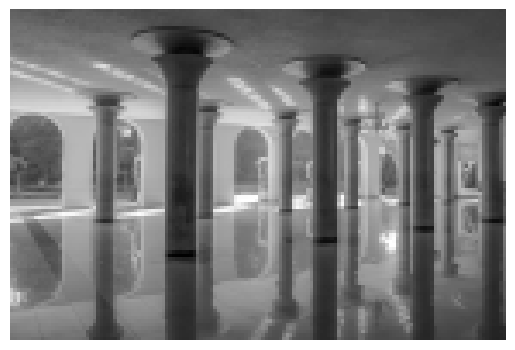

In [30]:
h, w = len(img), len(img[0])
block_h = 5
block_w = 5
out = [[0.0]*out_w for _ in range(out_h)]
area = block_h * block_w
for i in range(out_h):
    for j in range(out_w):
        s = 0.0
        for di in range(block_h):
            for dj in range(block_w):
                s += img[i*block_h + di][j*block_w + dj]
        out[i][j] = s / area

print("Ukuran Gambar :", out_w, "x", out_h)

plt.figure()
plt.imshow(out, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

**MEDIAN**

Ukuran Gambar : 144 x 96


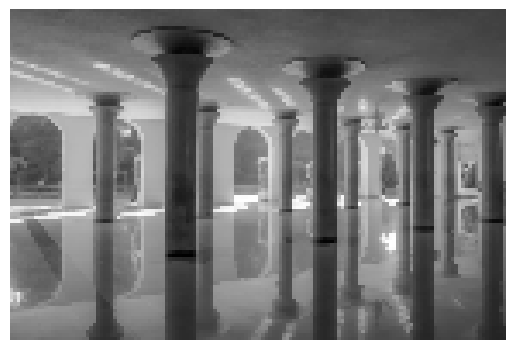

In [31]:
h, w = len(img), len(img[0])
block_h = 5
block_w = 5
out = [[0.0]*out_w for _ in range(out_h)]
area = block_h * block_w
for i in range(out_h):
    for j in range(out_w):
        block = sorted(
            img[i*block_h + di][j*block_w + dj]
            for di in range(block_h)
            for dj in range(block_w)
        )
        m = len(block)
        if m % 2 == 1:
            out[i][j] = block[m//2]
        else:
            out[i][j] = 0.5*(block[m//2 - 1] + block[m//2])

print("Ukuran Gambar :", out_w, "x", out_h)

plt.figure()
plt.imshow(out, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# **Up Sampling**

**Nearest Neighbor**

Ukuran Gambar : 1440 x 960


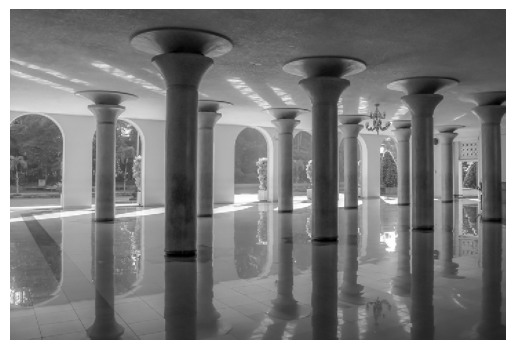

In [34]:
h, w = len(img), len(img[0])
scale_h = 2
scale_w = 2
out_h, out_w = int(h * scale_h), int(w * scale_w)
out = [[0.0]*out_w for _ in range(out_h)]
for i in range(out_h):
    for j in range(out_w):
        src_i = min(h - 1, int(round(i / scale_h)))
        src_j = min(w - 1, int(round(j / scale_w)))
        out[i][j] = img[src_i][src_j]

print("Ukuran Gambar :", out_w, "x", out_h)

plt.figure()
plt.imshow(out, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

**Bilinear**

Ukuran Gambar : 1440 x 960


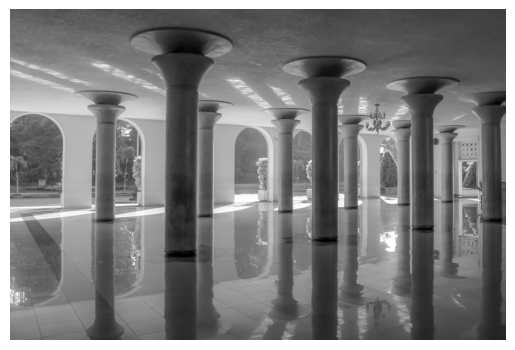

In [37]:
h, w = len(img), len(img[0])
scale_h = 2
scale_w = 2
out_h, out_w = int(h * scale_h), int(w * scale_w)
out = [[0.0]*out_w for _ in range(out_h)]
for i in range(out_h):
    fy = i / scale_h
    y0 = int(math.floor(fy))
    y1 = min(h - 1, y0 + 1)
    wy = fy - y0
    for j in range(out_w):
        fx = j / scale_w
        x0 = int(math.floor(fx))
        x1 = min(w - 1, x0 + 1)
        wx = fx - x0
        v00 = img[y0][x0]
        v01 = img[y0][x1]
        v10 = img[y1][x0]
        v11 = img[y1][x1]
        top = v00*(1-wx) + v01*wx
        bot = v10*(1-wx) + v11*wx
        out[i][j] = top*(1-wy) + bot*wy

print("Ukuran Gambar :", out_w, "x", out_h)

plt.figure()
plt.imshow(out, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

**Bicubic**

Ukuran Gambar : 1440 x 960


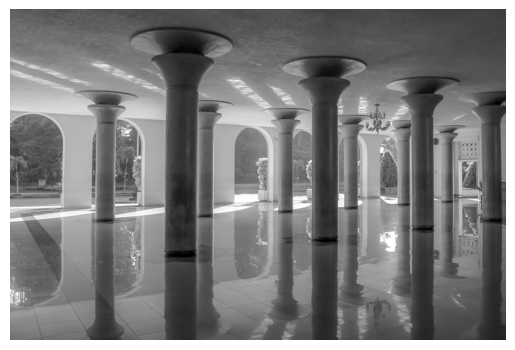

In [39]:
def _cubic_weight(t: float) -> float:
    a = -0.5
    t = abs(t)
    if t <= 1:
        return (a+2)*t**3 - (a+3)*t**2 + 1
    elif t < 2:
        return a*t**3 - 5*a*t**2 + 8*a*t - 4*a
    else:
        return 0

h, w = len(img), len(img[0])
scale_h = 2
scale_w = 2
out_h, out_w = int(h * scale_h), int(w * scale_w)
out = [[0.0]*out_w for _ in range(out_h)]
for i in range(out_h):
    fy = i / scale_h
    y_int = int(math.floor(fy))
    for j in range(out_w):
        fx = j / scale_w
        x_int = int(math.floor(fx))
        value = 0.0
        total_w = 0.0
        for m in range(-1, 3):
            wy = _cubic_weight(m - (fy - y_int))
            y = min(max(y_int + m, 0), h - 1)
            for n in range(-1, 3):
                wx = _cubic_weight(n - (fx - x_int))
                x = min(max(x_int + n, 0), w - 1)
                wgt = wx * wy
                value += img[y][x] * wgt
                total_w += wgt
        out[i][j] = value / total_w if total_w != 0 else 0

print("Ukuran Gambar :", out_w, "x", out_h)

plt.figure()
plt.imshow(out, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()